In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
devLabels = open('../Dataset/trial/us_trial.labels').readlines()
devLabels = [int(x.strip()) for x in devLabels]
testLabels = open('../Dataset/test/us_test.labels').readlines()
testLabels = [int(x.strip()) for x in testLabels]

In [20]:
devCounts = [0 for i in range(0,20)]
testCounts = [0 for i in range(0,20)]

In [21]:
for i in devLabels:
    devCounts[int(i)] += 1
for i in testLabels:
    testCounts[int(i)] += 1

In [22]:
devLabels = pd.DataFrame(devLabels, columns=['label'])
testLabels = pd.DataFrame(testLabels, columns=['label'])

<AxesSubplot:>

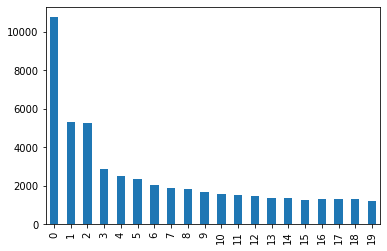

In [23]:
devLabels['label'].value_counts().plot(kind='bar')

<AxesSubplot:>

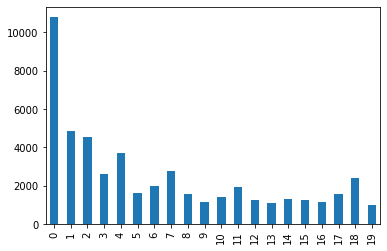

In [25]:
testLabels['label'].value_counts().plot(kind='bar')


In [27]:
trialData = open('../Dataset/trial/us_trial.text').readlines()
testData = open('../Dataset/test/us_test.text').readlines()

In [28]:
trainText = [str(x.strip()) for x in trialData]
testText = [str(x.strip()) for x in testData]

In [29]:
trialData = pd.DataFrame(trainText, columns=['text'])
testData = pd.DataFrame(testText, columns=['text'])

In [30]:
trialData.shape, devLabels.shape, testLabels.shape, testData.shape

((50000, 1), (50000, 1), (50000, 1), (50000, 1))

In [38]:
trialData.loc[1000]

text    Exchanging glances with bae like... #sloth @ T...
Name: 1000, dtype: object

In [36]:
devLabels.loc[1000]

label    14
Name: 1000, dtype: int64

In [39]:
devData = pd.concat([trialData, devLabels], axis=1)

In [41]:
devData.shape

(50000, 2)

In [42]:
testData = pd.concat([testData, testLabels], axis=1)

In [43]:
testData.shape

(50000, 2)

In [63]:
totalData = pd.concat([devData, testData], axis=0)

In [64]:
totalData.shape

(100000, 2)

In [65]:
totalData.head()

,text,label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2


In [90]:
df = totalData.copy().reset_index(drop=True)

In [91]:
df = df.sort_values(by=['label']).reset_index(drop=True)

In [92]:
df.head(-10)

,text,label
0,A little throwback with my favourite person @ ...,0
1,Ennnjoyed Y’all ! ️ @ Liason Restaurant,0
2,"️ Love you, Bear. - Drinking a Screeching Sand...",0
3,Merry Christmas from the two of us @ Mint Hill...,0
4,Longingly awaiting Corrado and Saskia’s specia...,0
...,...,...
99985,Feelin' horny in #sturgis for the #sturgis2016...,19
99986,Shawty get loooose #rachattemptshiphop #physic...,19
99987,"U made it a gary happy birthday @ Birmingham, ...",19
99988,Dramatic change for a dramatic girl @ Color Di...,19


In [93]:
df.shape

(100000, 2)

<AxesSubplot:>

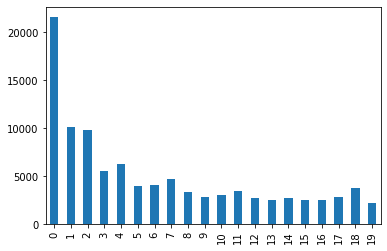

In [94]:
df['label'].value_counts().sort_index().plot(kind='bar')

In [95]:
df['label'].value_counts().sort_index()


0     21558
1     10109
2      9775
3      5490
4      6233
5      3930
6      4045
7      4643
8      3345
9      2846
10     2976
11     3477
12     2727
13     2460
14     2683
15     2493
16     2459
17     2824
18     3703
19     2224
Name: label, dtype: int64

In [96]:
multipleDF = {}

In [104]:
for i in range(0,20):
    multipleDF[i] = df[df['label'] == i]
    multipleDF[i] = multipleDF[i].sample(frac=1).reset_index(drop=True)

In [105]:
multipleDF[0].head()

,text,label
0,️ @ Epcot - Walt Disney World,0
1,Don't just hurry...RUSH @ Wayne State University,0
2,Minutes go by like seconds with this girl. ️ W...,0
3,The Perfect View #Vineyard #Arrington #Tennessee…,0
4,What if poke was made for tiny people? ️ Tag a...,0


In [106]:
finalTrainData = pd.DataFrame()
finalTestData = pd.DataFrame()
finalDevData = pd.DataFrame()

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
for i in multipleDF:
    finalTrainData = pd.concat([finalTrainData, multipleDF[i].iloc[:int(np.floor(0.7*multipleDF[i].shape[0])), :]], axis=0)
    finalTestData = pd.concat(
        [finalTestData, multipleDF[i].iloc[int(np.floor(0.7*multipleDF[i].shape[0])):int(np.floor(0.9*multipleDF[i].shape[0])), :]], axis=0)
    finalDevData = pd.concat(
        [finalDevData, multipleDF[i].iloc[int(np.floor(0.9*multipleDF[i].shape[0])):, :]], axis=0)


In [102]:
finalTrainData.shape, finalTestData.shape, finalDevData.shape

((69992, 2), (20000, 2), (10008, 2))

In [109]:
finalTrainData = finalTrainData.sample(frac=1).reset_index(drop=True)
finalTestData = finalTestData.sample(frac=1).reset_index(drop=True)
finalDevData = finalDevData.sample(frac=1).reset_index(drop=True)

In [116]:
trainText = finalTrainData['text'].values
trainLabels = finalTrainData['label'].values
devText = finalDevData['text'].values
devLabels = finalDevData['label'].values
testText = finalTestData['text'].values
testLabels = finalTestData['label'].values

In [118]:
trainText.shape, trainLabels.shape, devText.shape, devLabels.shape, testText.shape, testLabels.shape

((69992,), (69992,), (10008,), (10008,), (20000,), (20000,))

In [119]:
with open('../Dataset/finalTrainText.text', 'w') as f:
    for i in trainText:
        f.write(i + '\n')

In [120]:
with open('../Dataset/finalTrainLabels.labels', 'w') as f:
    for i in trainLabels:
        f.write(str(i) + '\n')

In [128]:
with open('../Dataset/finalDevText.text', 'w') as f:
    for i in devText:
        f.write(i + '\n')
with open('../Dataset/finalDevLabels.labels', 'w') as f:
    for i in devLabels:
        f.write(str(i) + '\n')
with open('../Dataset/finalTestText.text', 'w') as f:
    for i in testText:
        f.write(i + '\n')
with open('../Dataset/finalTestLabels.labels', 'w') as f:
    for i in testLabels:
        f.write(str(i) + '\n')